In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,confusion_matrix,auc,roc_curve
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('./datas/SMSSpamCollection',delimiter='\t',header=None)
X=df[1].values
y=df[0].values
le=LabelEncoder()
y_trans=le.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y_trans)

In [6]:
pipeline=Pipeline([('tfidf',TfidfVectorizer()),('logr',LogisticRegression())])
parameters={
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__stop_words': ('english', None),
    'tfidf__max_features': (2500, 5000, None),
    'tfidf__ngram_range': ((1, 1), (1, 2)),
    'tfidf__use_idf': (True, False),
    'logr__penalty': ('l1', 'l2'),
    'logr__C': (0.01, 0.1, 1, 10),
}
g_search=GridSearchCV(estimator=pipeline,param_grid=parameters,n_jobs=-1,scoring='accuracy',cv=3,verbose=1)

In [26]:
g_search.fit(X_train,y_train)
g_search.best_score_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:   40.6s finished


0.9851639148121559

In [29]:
best_params=g_search.best_estimator_.get_params()
for name in parameters.keys():
    print(name,'---->',best_params[name])

tfidf__max_df ----> 0.5
tfidf__stop_words ----> None
tfidf__max_features ----> 2500
tfidf__ngram_range ----> (1, 2)
tfidf__use_idf ----> True
logr__penalty ----> l2
logr__C ----> 10


In [34]:
y_=g_search.predict(X_test)
print('accuracy',accuracy_score(y_test,y_))
print('precision',precision_score(y_test,y_))
print('recall',recall_score(y_test,y_))
print('f1',f1_score(y_test,y_))
print('马修斯相关系数',matthews_corrcoef(y_test,y_))
classification_report(y_test,y_)

accuracy 0.9834888729361091
precision 0.9942857142857143
recall 0.8877551020408163
f1 0.9380053908355795
马修斯相关系数 0.9305007641018477


'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      1197\n           1       0.99      0.89      0.94       196\n\n    accuracy                           0.98      1393\n   macro avg       0.99      0.94      0.96      1393\nweighted avg       0.98      0.98      0.98      1393\n'

[[1196    1]
 [  22  174]]


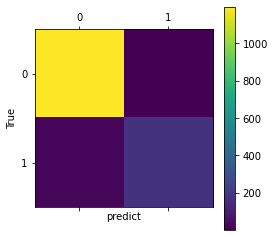

In [40]:
confusion=confusion_matrix(y_test,y_)
print(confusion)
plt.matshow(confusion)
plt.ylabel('True')
plt.xlabel('predict')
plt.colorbar()

In [53]:
proba=g_search.predict_proba(X_test)
false_positive,recall,thresholds=roc_curve(y_test,proba[:,1])
auc(false_positive,recall)

0.9921146403423525

Text(0.5, 0, 'flase positive')

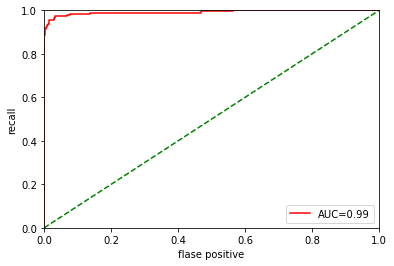

In [55]:
plt.plot(false_positive,recall,c='r',label='AUC=%0.2f'%auc(false_positive,recall))
plt.legend()
plt.plot([0,1],[0,1],'g--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('recall')
plt.xlabel('flase positive')

In [52]:
confusion[0,1]/(confusion[0,1]+confusion[0,0]) #假阳性率

0.000835421888053467